In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df_genres = pd.read_csv('tmdb_genres.csv')
df_genres.rename(columns={'Unnamed: 0':'genres_id'}, inplace=True)
#df_genres.set_index('genres_id', inplace=True)
genre_dict = dict(zip(df_genres['genres_id'].unique(),df_genres['genres']))
genre_dict

{28.0: 'Action',
 12.0: 'Adventure',
 14.0: 'Fantasy',
 16.0: 'Animation',
 878.0: 'Science Fiction',
 18.0: 'Drama',
 53.0: 'Thriller',
 10751.0: 'Family',
 35.0: 'Comedy',
 36.0: 'History',
 10752.0: 'War',
 37.0: 'Western',
 10749.0: 'Romance',
 80.0: 'Crime',
 9648.0: 'Mystery',
 27.0: 'Horror',
 99.0: 'Documentary',
 10402.0: 'Music',
 10770.0: 'TV Movie',
 nan: nan,
 10769.0: 'Foreign'}

In [4]:
df_movies = pd.read_csv('tmdb_movies.csv')
df_movies

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN


In [5]:
df_movies.vote_count.describe().loc['75%']

737.0

In [6]:
df_movies[df_movies['vote_count']>=df_movies.vote_count.describe().loc['75%']].sort_values(by='vote_average',ascending=False).reset_index()[0:10]

,index,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
1,3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
2,2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
3,3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
4,2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
5,3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
6,1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
7,662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
8,2170,2170,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0
9,1847,1847,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0


In [7]:
df_movies['year'] = pd.DatetimeIndex(df_movies['release_date']).year
budgets = np.zeros(7)
for i in range (2010,2017):
    budgets[i-2010] = df_movies[(df_movies['year']==i)].budget.mean()
revenues = np.zeros(7)
for i in range (2010,2017):
    revenues[i-2010] = df_movies[(df_movies['year']==i)].revenue.mean()
revenues

array([9.04381101e+07, 9.20041308e+07, 1.16065915e+08, 1.01348456e+08,
       1.01346599e+08, 1.05439927e+08, 1.39049586e+08])

In [8]:
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)

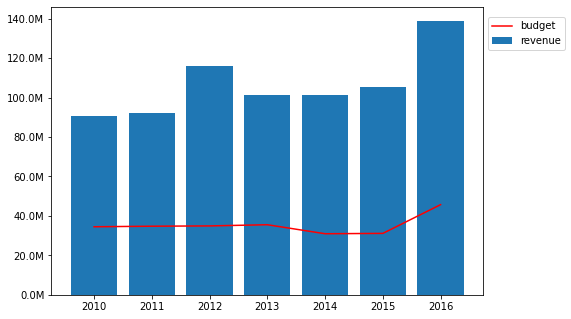

In [9]:
years = np.arange(2010, 2017)
x = np.arange(11)

formatter = plt.FuncFormatter(million)

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.yaxis.set_major_formatter(formatter)
axes.plot(years,budgets,label='budget',color='red')
axes.bar(years,revenues,label='revenue')

axes.legend(loc=(1.01,0.85))

In [17]:
df_movies['genre'] = df_movies['genre_id'].map(genre_dict)
df_movies

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year,genre
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0,1992.0,Action
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0,2011.0,Comedy
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0,2013.0,Comedy
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,2012.0,NaN


In [52]:
df_movies['genre'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genre, dtype: int64

In [50]:
df_movies.groupby('genre').mean().sort_values('runtime',ascending=False)['runtime']

genre
History            133.960000
War                126.125000
Western            117.925926
Drama              115.521559
Adventure          113.061947
Crime              112.143590
TV Movie           110.500000
Action             109.058355
Science Fiction    109.031250
Romance            107.094340
Fantasy            106.487179
Thriller           105.690722
Music              102.852941
Mystery            100.609756
Comedy             100.464491
Horror              94.753333
Documentary         93.511364
Family              89.803571
Animation           89.552846
Foreign             83.000000
Name: runtime, dtype: float64

In [54]:
df_movies[df_movies['genre']=='History']['runtime']

110     183.0
280     140.0
633     149.0
839     134.0
1091    192.0
1349    130.0
1677    140.0
1877    144.0
1954    128.0
2008    124.0
2115    127.0
2141    128.0
2370    120.0
2522    113.0
2680    105.0
2697    120.0
2709    150.0
2712    117.0
2784    110.0
2973    145.0
3447    110.0
3590    139.0
4110     92.0
4497    225.0
4597     84.0
Name: runtime, dtype: float64

<AxesSubplot:>

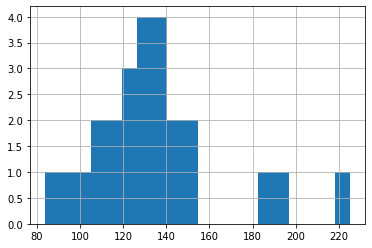

In [56]:
df_movies[df_movies['genre']=='History']['runtime'].hist(bins=20)